In [1]:
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "Salary_Data.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+"Salary_Data.csv")
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

Salary_Data.csv


In [2]:
import pandas as pd

def load_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  csv_path = os.path.join(data_path,file_to_download)
  return pd.read_csv(csv_path)

salary_data = load_data()

salary_data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Separando os dados para a variável independente e para variável dependente 
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:, 1].values

print(X); 
print(Y); 


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [4]:
#Descrevendo o conjunto de dados
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
#Separando os grupos de treinamento e de teste

X_treino = X[:10,:]
X_teste = X[10:,:]

Y_treino = Y[:10]
Y_teste = Y[10:]

print(X_treino);
print(X_teste);
print(Y_treino);
print(Y_teste);


[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]
 [2.9]
 [3. ]
 [3.2]
 [3.2]
 [3.7]]
[[ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[39343. 46205. 37731. 43525. 39891. 56642. 60150. 54445. 64445. 57189.]
[ 63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.  81363.
  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969. 112635.
 122391. 121872.]


In [7]:
#Preparando e treinando a regressão linear
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
#Realizando a previsão
previsao = regr.predict(X_teste)


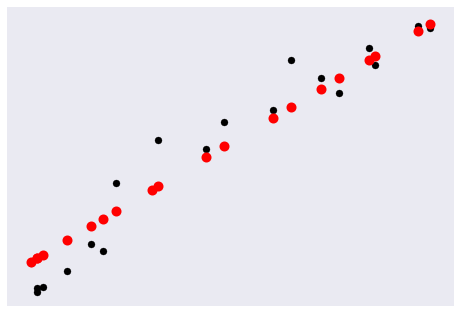

In [9]:
#Plotando os pontos de teste (preto) e a previsão (vermelho) 
plt.scatter(X_teste, Y_teste,  color='black')
plt.scatter(X_teste, previsao, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()